In [1]:
import pandas as pd

In [1]:
from src.osm.bk_facs_rules import ftr_func
from src.osm.osmdb_filter import select_bk_facs_with_geom
from src.constants import tag_for_pattern, ftr_name_bk_facs, index_seg, index_ln
from src.geom_helper import lns_polys2lns
import geopandas as gp
import pandas as pd
from src.constants import fn_osm_db_dc, fn_segments_dc, epsg_dc, fn_feature_bk_facs_dc


In [33]:
data_dir = 'data/'
path_osm_db_dc = data_dir + fn_osm_db_dc
path_segs_dc = data_dir + fn_segments_dc
path_ftr_dc = data_dir + fn_feature_bk_facs_dc

bk_facs = select_bk_facs_with_geom(path_osm_db_dc, ot='W')
# vectorizing tags
for t in tag_for_pattern:
    bk_facs[t] = bk_facs.tags.apply(lambda x: x.get(t,''))
# extract features by manual rules
for ftr in ftr_name_bk_facs:
    bk_facs[ftr] = bk_facs.apply(ftr_func[ftr], axis=1)


In [8]:
%matplotlib inline

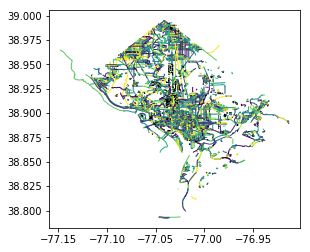

In [9]:
bk_facs.plot()

In [22]:
from src.leaflet_creation import create_map_visualization, get_color_for_df

In [34]:
html_title = 'bk_facs_osm'
file_path = ''
file_name = 'bk_facs_osm'
lon, lat = -77.0908494, 38.9045525  #D.C.
zoom = 12
init_layers = ['streets', 'stsg']
map_layers = ['light','streets', 'satellite']
binding_data=[['bk_facs_map','actual map']]
# gpdf1['color'] = '#aa0'
bk_facs['color'] = '#fee08b'
gpdfs = [bk_facs]
create_map_visualization(html_title, file_path, file_name, lat, lon, zoom, init_layers, map_layers, binding_data, gpdfs, width=1000)

In [17]:
from src.ftr_poi import map_osm_to_poi_category
from src.constants import fn_mapping_for_osm

In [18]:

path_mapping_for_osm = data_dir+fn_mapping_for_osm

In [11]:
import pandas as pd
import geopandas as gp

In [2]:
d311 = pd.read_csv('data/raw_data/opendc/Cityworks_Service_Requests.csv')

D:\ProgramFiles\Anaconda3\envs\py27\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,15,23,26,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d311['Date'] = pd.to_datetime(d311.INITIATEDDATE)

In [4]:
d311['year'] = d311['Date'].apply(lambda x: x.year)
d311['month'] = d311['Date'].apply(lambda x: x.month)

In [5]:
# d311_slice = d311[(d311.year==2017) & (d311.month==1)].copy()
d311_slice = d311[(d311.year==2017)].copy()

In [6]:
from shapely.geometry import Point

In [7]:
d311_slice['geometry'] = d311_slice.apply(lambda x: Point(x.X, x.Y), axis=1)

In [12]:
d311_slice = gp.GeoDataFrame(d311_slice)
d311_slice.crs={'init':'epsg:4326'}

In [13]:
d311_slice= d311_slice.to_crs(epsg=3559)

In [14]:
d311_slice['geometry'] = d311_slice.buffer(5)

In [28]:
# d311_slice['geometry'] = d311_slice.apply(lambda x: Point(x.X, x.Y).buffer(0.0001) 
#                                           if x.DESCRIPTION in ['POTHOLES', 'ROADWAY REPAIR']
#                                           else Point(x.X, x.Y).buffer(0.0001) , axis=1)

In [15]:
def get_color(des):
    if des =='POTHOLES':
        return '#fee08b'
    if des=='ROADWAY REPAIR':
        return '#1b7837'
    return '#762a83'

In [16]:
d311_slice['color'] = d311_slice.DESCRIPTION.apply(get_color)

In [25]:
gpdf = d311_slice[['geometry', 'DESCRIPTION', 'color']][d311_slice.DESCRIPTION=='POTHOLES'].to_crs(epsg=4326)

In [31]:
# gpdf = gp.GeoDataFrame(d311_slice[['geometry', 'DESCRIPTION', 'color']])

In [26]:
html_title = '311_raw'
file_path = ''
file_name = '311_raw_17'
lon, lat = -77.0908494, 38.9045525  #D.C.
zoom = 12
init_layers = ['streets', 'stsg']
map_layers = ['light','streets', 'satellite']
binding_data=[['d311_map','311 map']]
gpdfs = [gpdf]
create_map_visualization(html_title, file_path, file_name, lat, lon, zoom, init_layers, map_layers, binding_data, gpdfs, width=1000)